In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(data.head())
print(test_data.head())

   id  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   0   58    1                4  152          239             0            0   
1   1   52    1                1  125          325             0            2   
2   2   56    0                2  160          188             0            2   
3   3   44    0                3  134          229             0            2   
4   4   58    1                4  140          234             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     158                1            3.6            2   
1     171                0            0.0            1   
2     151                0            0.0            1   
3     150                0            1.0            2   
4     125                1            3.8            2   

   Number of vessels fluro  Thallium Heart Disease  
0                        2         7      Presence  
1                        0         3       Absence  
2    

In [35]:
# Exploring missing data
print(data.isnull().sum())
print("separation")
print(test_data.isnull().sum()) 

data.drop(columns=["id"],inplace=True)

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
separation
id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64


In [7]:
# Chest pain
# Value between 1 -4
data["Chest pain type"].describe()

count    630000.000000
mean          3.312752
std           0.851615
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Chest pain type, dtype: float64

In [26]:
# Exploring Thallium
# Value exists from 3-7
data["Thallium"].describe()
data["Thallium"].value_counts()

Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64

In [9]:
# Exploring Number of major vessels
# Value exists from 0-3
data['Number of vessels fluro'].describe()

count    630000.000000
mean          0.451040
std           0.798549
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: Number of vessels fluro, dtype: float64

# RF model 


Used to check feature significance, unsupervised learning model good for exploring key relationships. Consider dropping everything else to prevent overfitting





In [10]:
# X_train = data.drop('Heart Disease', axis=1)
# y_train = data['Heart Disease']

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# predictions = rf.predict(test_data)
# print(predictions)
# accuracy = rf.score(X_train, y_train)
# print(f"Training Accuracy: {accuracy}")

KeyboardInterrupt: 

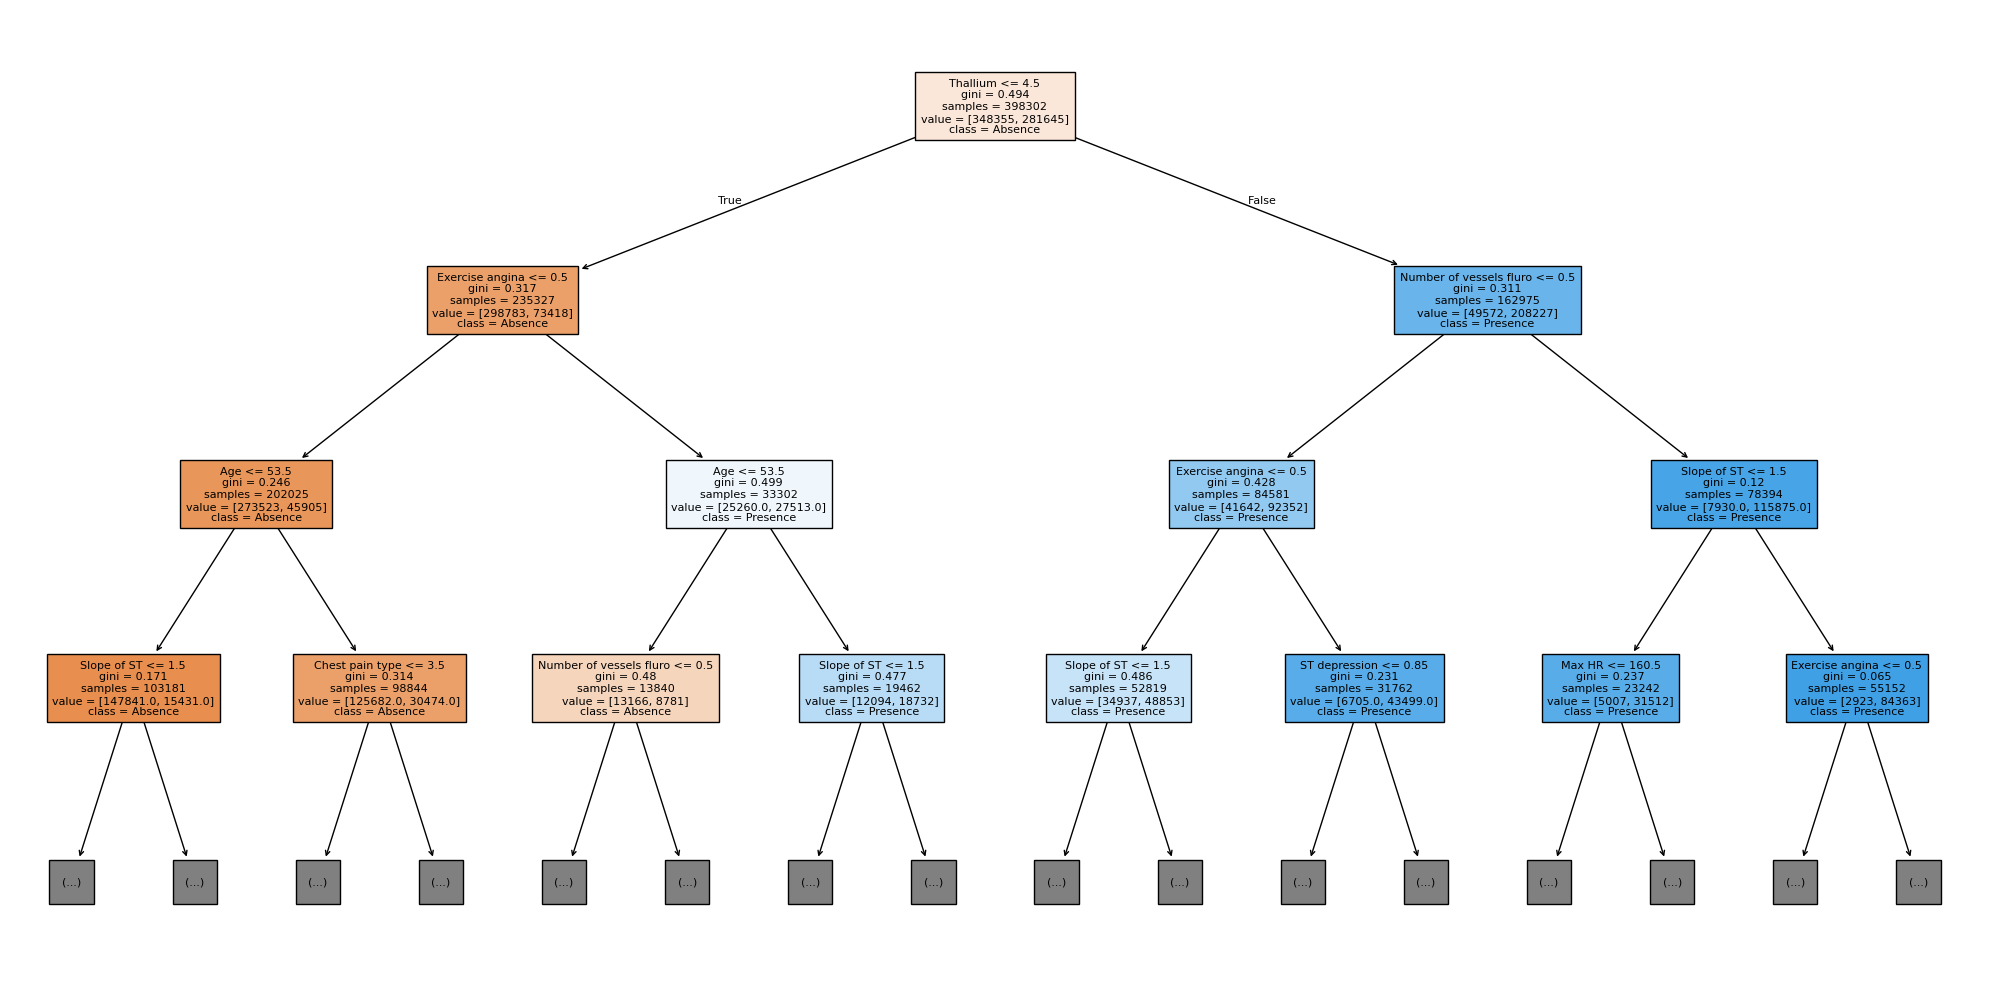

In [ ]:
# est=rf.estimators_[0]
# plt.figure(figsize=(20,10))
# plot_tree(est,
#            feature_names=X_train.columns,
#            class_names=rf.classes_ ,
#            filled=True,
#            max_depth=3,
#            fontsize=8)
# plt.tight_layout()
# plt.show()

# Description of Features

- Age (numerical)
- Sex
- Chest pain type
- BP (numerical)
- Cholesterol (numerical)
- FBS over 120
- EKG result
- Max HR (numerical)
- Exercise angina - chest pain or discomfort that happens when your heart isnt receiving enough blood, potential symptom of heart disease
- ST depression (numerical)
- Slope of ST
- Number of vessels fluro
- Thallium

In [ ]:
# Chest pain grouping


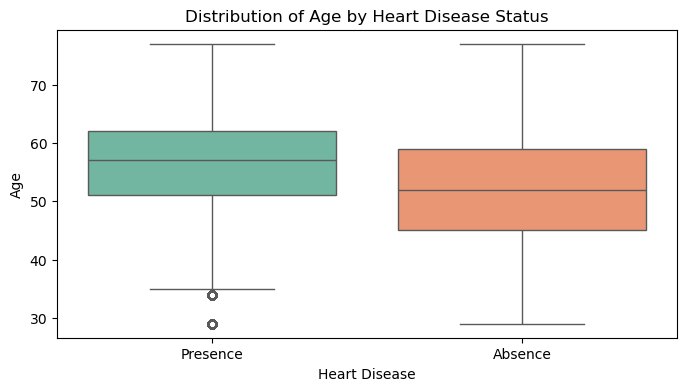

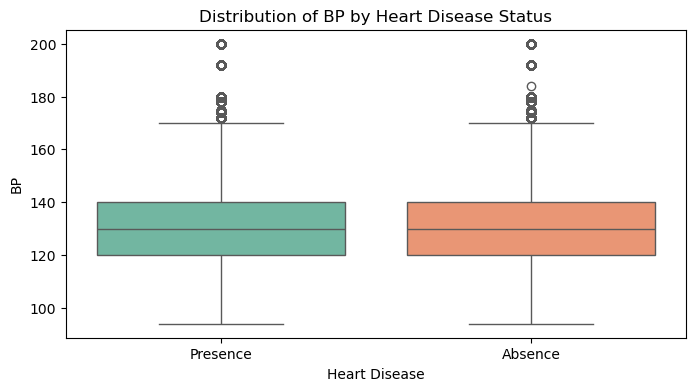

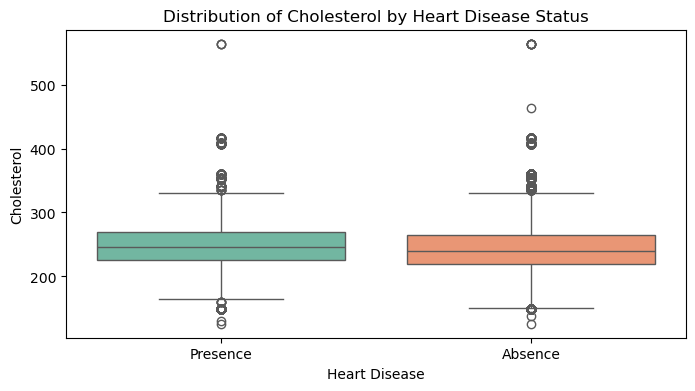

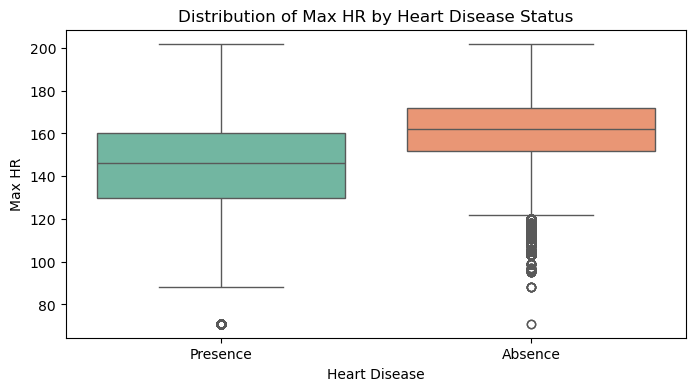

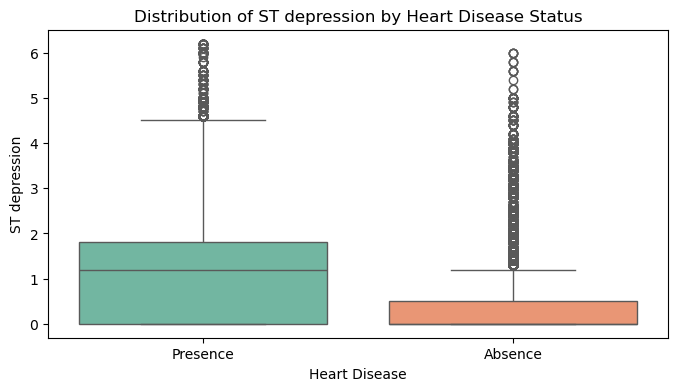

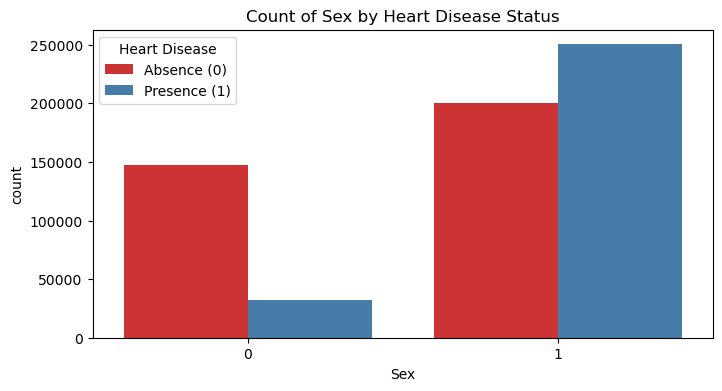

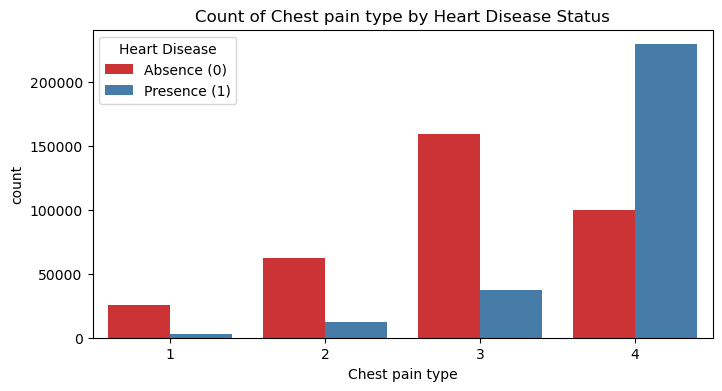

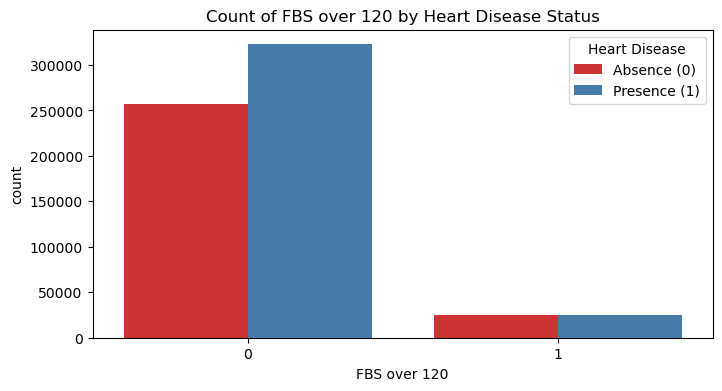

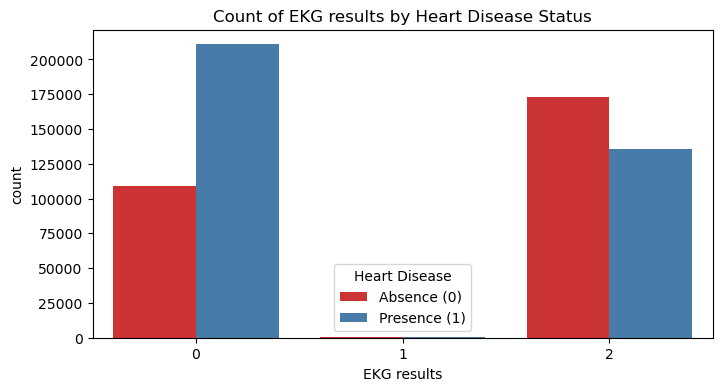

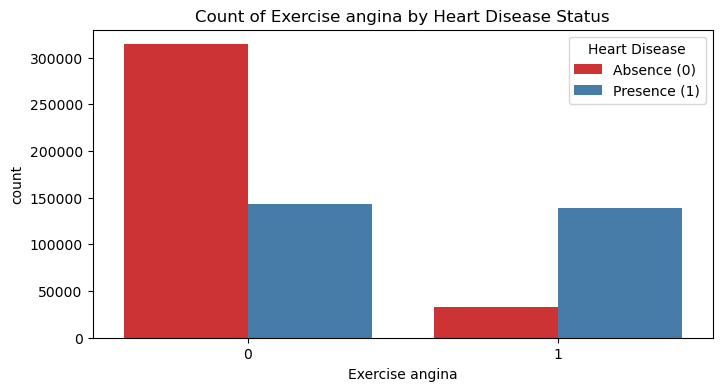

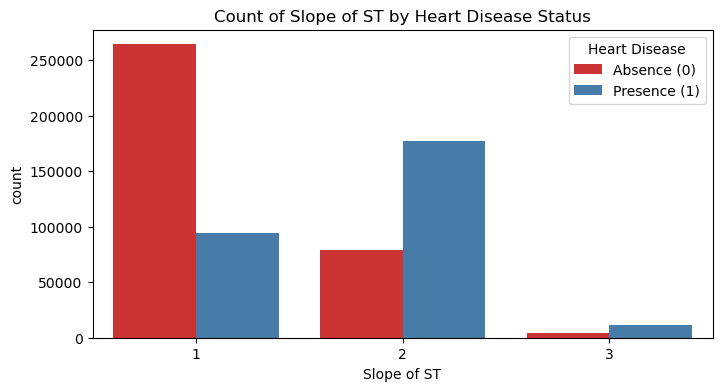

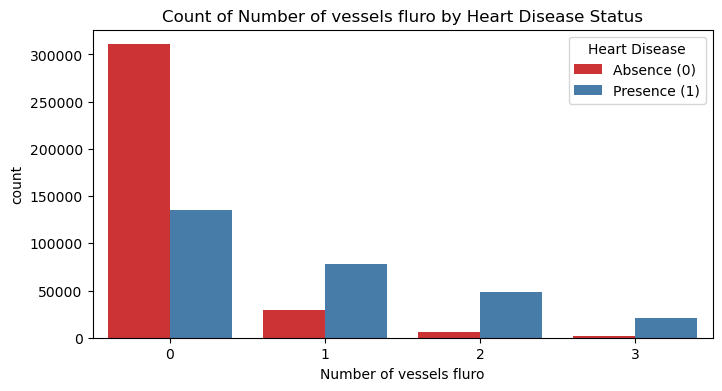

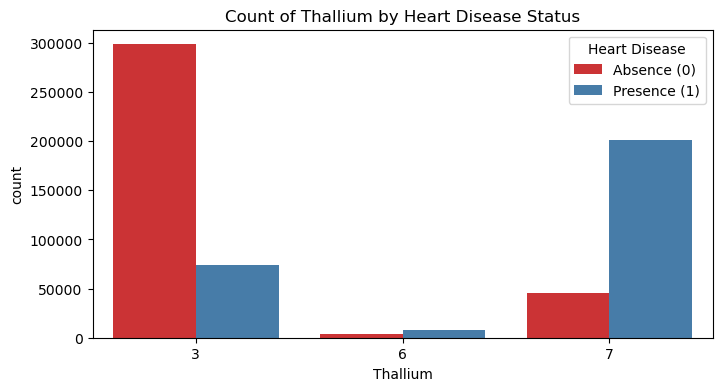

In [23]:
target = 'Heart Disease'
# Identify feature types here (we could do this automatically but easier to just do manually)
cols = data.columns.drop(target)
numerical_cols = ['Age','BP','Cholesterol','Max HR','ST depression']
categorical_cols = []
for col in cols :
    if col not in numerical_cols :
        categorical_cols.append(col)

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=target, y=col, hue=target, palette='Set2', legend=False)
    plt.title(f'Distribution of {col} by Heart Disease Status')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue=target, palette='Set1')
    plt.title(f'Count of {col} by Heart Disease Status')
    plt.legend(title='Heart Disease', labels=['Absence (0)', 'Presence (1)'])
    plt.show()

# Notes
- BP: 1st and 3rd quartiles for people who have and do not have heart disease seem to be the same
- Max HR - people with heart diseases can be seen to have lower max heart rates
- ST depression - people with heart diseases seem to have significantly greater ST depression
- Chest pain seems to be an extremely good indicator of heart disease (especially when chest pain > 4). Also seems to be a good indicator of no heart disease when chest pain value <4
- Slope of ST - when ==1, significantly more present in absent patients, when ==2 significantly more present in patients with heart disease
- Number of vessels fluro, when number of vessels fluro =2 or 3, significantly more prevalent in patients with. 1 also shows a stark difference but not as stark, consider grouping 2 and 3 together. Additionally, number =0 significantly more prevalent in patients without (consider doing this during one hot encoding to reduce dimensionality)
- Thallium - only 3 values exist (3,6,7) -> Thallium = 7 is much more abundant in patients with HD, while Thallium = 3 is much more prevalent in patients without, while Thalliumm = 6 shows slight favouritism towards patients with HD
- 

# Shouldnt do this since the removal of information likely outweights the benefits that arrive with the reduced dimensionality, instead we can just weight each of these levels by the frequency in which they appear

## Next steps, 
1) Create new features for Slope of ST, 
   Number of vessels fluro (3 categories: 0 , 1, 2 and above), 
   chest pain type (2 categories: 4, 3 and below)
2) Do simple plots and EDA on these new features

In [ ]:
# # Collapsing Number of vessels fluro into 3 categories: 0, 1, 2
# data["Number of vessels fluro"].value_counts()
# data["Number of vessels fluro"] = data["Number of vessels fluro"].where(data["Number of vessels fluro"] <2 , 2)

In [ ]:
# # Introducing Slope of ST 
# data["Slope of ST"] = data["Slope of ST"].where(data["Slope of ST"] <2 , 2)

In [ ]:
# # Collapsing Chest pain type
# data["Chest pain type"] = data["Chest pain type"].where(data["Chest pain type"] ==4 , 3)
# data["Chest pain type"].value_counts()

Chest pain type
4    329179
3    300821
Name: count, dtype: int64

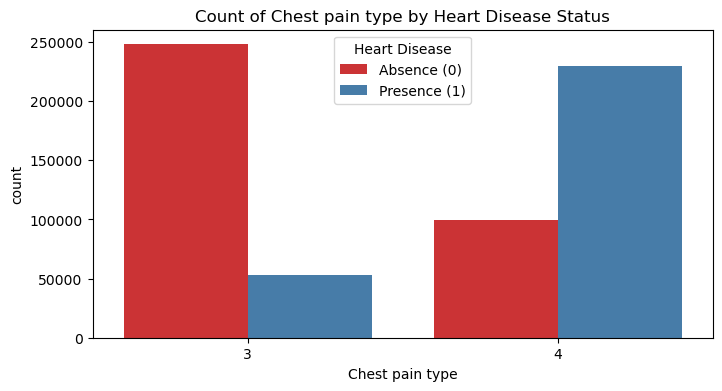

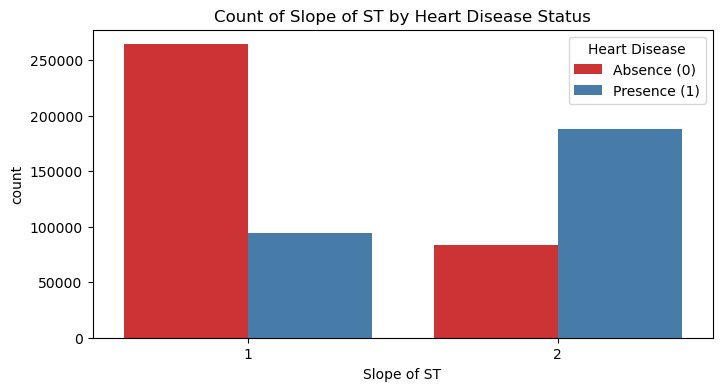

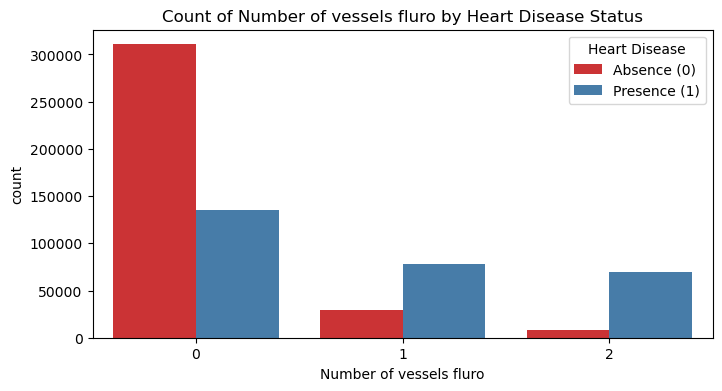

In [40]:
categorical_cols = ["Chest pain type", "Slope of ST","Number of vessels fluro"]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue=target, palette='Set1')
    plt.title(f'Count of {col} by Heart Disease Status')
    plt.legend(title='Heart Disease', labels=['Absence (0)', 'Presence (1)'])
    plt.show()